**i) Read the data from the file “people.txt”.<br>**
**ii) Create a ruleset E that contain rules to check for the following conditions:<br>**
-  **The age should be in the range 0-150.<br>**
-  **The age should be greater than yearsmarried.<br>**
-  **The status should be married or single or widowed.<br>**
-  **If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup**
  **should be adult, if age is more than 65 the agegroup should be elderly.<br>**

**iii) Check whether ruleset E is violated by the data in the file people.txt.<br>**
**iv) Summarize the results obtained in part (iii)<br>**
**v) Visualize the results obtained in part (iii)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the data from the file “people.txt”.

In [2]:
df=pd.read_csv("people.csv")

In [3]:
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


## Create a ruleset E that contain rules to check for the following conditions:<br>

- **The age should be in the range 0-150.<br>**
- **The age should be greater than yearsmarried.<br>**
- **The status should be married or single or widowed.<br>**
- **If age is less than 18 the agegroup should be child<br>** 
- **if age is between 18 and 65 the agegroup should be adult.<br>**
- **if age is more than 65 the agegroup should be elderly.**

In [4]:
# RULESET

def ruleset(df):
    invalid=[]
    for i in range(df.shape[0]):
        
        age=df.iloc[i][0]
        ageGrp=df.iloc[i][1]
        height=df.iloc[i][2]
        status=df.iloc[i][3]
        yearsMarried=df.iloc[i][4]
        rules=[]
        if(age < 0 or age > 150): rules.append('rule 1')
        if(age < yearsMarried): rules.append('rule 2')
        if(status not in ['single','married','widowed']): rules.append('rule 3')
        if((age<18) & (ageGrp !='child')): rules.append('rule 4a')
        if((age>18 & age<65) & (ageGrp!='adult')): rules.append('rule 4b')
        if((age >=65) & (ageGrp!='elderly')): rules.append('rule 4c')
        
        if rules:
            invalid.append({i:rules})
        
    if not invalid:
        return "All data is satisfies the rule set"
    else: 
        print("Index of all rows that dont satify the ruleset",invalid)
        return invalid

## Check whether ruleset E is violated by the data in the file people.txt.
##  Summarize the results obtained in part (iii)

In [5]:
x=ruleset(df)
for i in x:
    for y in i.keys():
        print(i)
        print(df.iloc[y])
#         df.append(df.iloc[y])
        print("--"*50)

Index of all rows that dont satify the ruleset [{2: ['rule 2']}, {3: ['rule 1', 'rule 4b']}, {4: ['rule 4b']}]
{2: ['rule 2']}
Age                  18
agegroup          adult
height              5.7
status          married
yearsmarried         20
Name: 2, dtype: object
----------------------------------------------------------------------------------------------------
{3: ['rule 1', 'rule 4b']}
Age                 221
agegroup        elderly
height              5.0
status          widowed
yearsmarried          2
Name: 3, dtype: object
----------------------------------------------------------------------------------------------------
{4: ['rule 4b']}
Age                  34
agegroup          child
height             -7.0
status          married
yearsmarried          3
Name: 4, dtype: object
----------------------------------------------------------------------------------------------------


In [6]:
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


# visualize the results obtained in part (iii)

<Axes: >

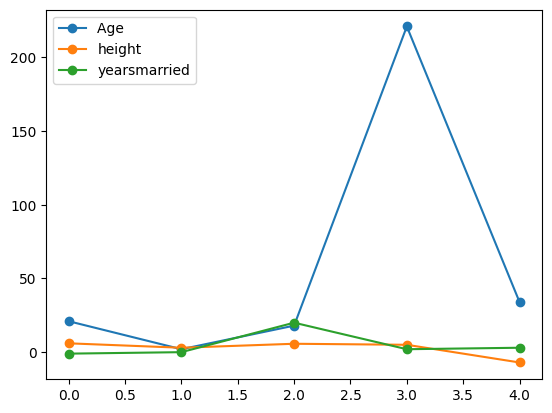

In [7]:
df.plot(marker='o')

array([[<Axes: >],
       [<Axes: >],
       [<Axes: >]], dtype=object)

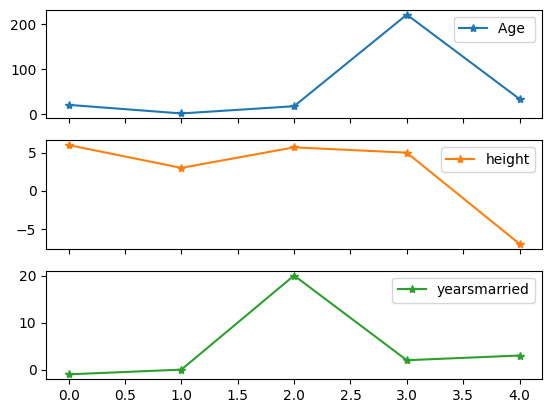

In [8]:
df.plot(subplots=True, layout=(3,1),marker='*')